In [49]:
### 4. Gradient Boosting 

# Training & creating predictions: 
from sklearn.ensemble import GradientBoostingClassifier
gbc_smo = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(x_train_smo, y_train_smo)
gbc_pred_smo = gbc_smo.predict(x_test)
print('Accuracy of GB classifier - SMO on test set: {:.2f}'.format(gbc_smo.score(x_test, y_test)))

gbc_ada = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(x_train_ada, y_train_ada)
gbc_pred_ada = gbc_ada.predict(x_test)
print('Accuracy of GB classifier - ADA on test set: {:.2f}'.format(gbc_ada.score(x_test, y_test)))

gbc_us = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(x_train_us, y_train_us)
gbc_pred_us = gbc_us.predict(x_test_us)
print('Accuracy of GB classifier - US on test set: {:.2f}'.format(gbc_us.score(x_test_us, y_test_us)))


Accuracy of GB classifier - SMO on test set: 0.93
Accuracy of GB classifier - ADA on test set: 0.91
Accuracy of GB classifier - US on test set: 0.50


In [50]:
# Confusion matrices
print('Confusion matrix - GB with Smote:')
print(confusion_matrix(y_test, gbc_pred_smo))

print('\n','Confusion matrix - GB with Adasyn:')
print(confusion_matrix(y_test, gbc_pred_ada))

print('\n','Confusion matrix - GB with UnderSampling:')
print(confusion_matrix(y_test_us, gbc_pred_us))

Confusion matrix - GB with Smote:
[[448  14]
 [ 21   3]]

 Confusion matrix - GB with Adasyn:
[[442  20]
 [ 23   1]]

 Confusion matrix - GB with UnderSampling:
[[13 11]
 [13 11]]


In [51]:
# Accuracy measures: 
from sklearn.metrics import classification_report
print('Performance Measures - GB with Smote:')
print(classification_report(y_test, gbc_pred_smo)) 

print('\n','Performance Measures - GB with Adasyn:')
print(classification_report(y_test,gbc_pred_ada))

print('\n','Performance Measures - GB with Adasyn:')
print(classification_report(y_test_us,gbc_pred_us))

Performance Measures - GB with Smote:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       462
           1       0.18      0.12      0.15        24

    accuracy                           0.93       486
   macro avg       0.57      0.55      0.55       486
weighted avg       0.92      0.93      0.92       486


 Performance Measures - GB with Adasyn:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       462
           1       0.05      0.04      0.04        24

    accuracy                           0.91       486
   macro avg       0.50      0.50      0.50       486
weighted avg       0.91      0.91      0.91       486


 Performance Measures - GB with Adasyn:
              precision    recall  f1-score   support

           0       0.50      0.54      0.52        24
           1       0.50      0.46      0.48        24

    accuracy                           0.50        48
   macro

GB with SMOTE :


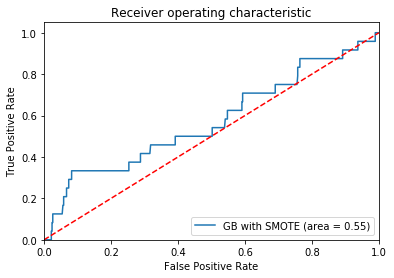

GB with ADASYN:


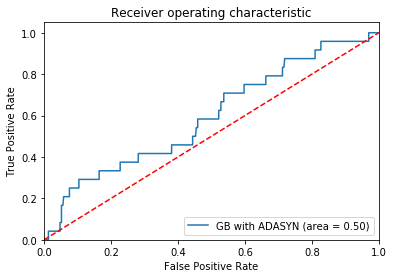

GB with US:


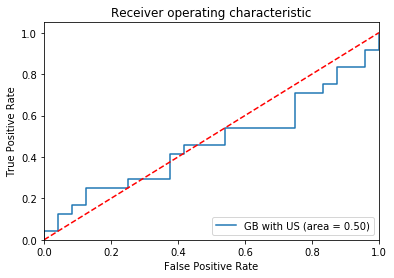

In [52]:
#AUC/ROC curves: 

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

print('GB with SMOTE :')
logit_roc_auc = roc_auc_score(y_test, gbc_smo.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, gbc_smo.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='GB with SMOTE (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

print('GB with ADASYN:')
logit_roc_auc = roc_auc_score(y_test, gbc_ada.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, gbc_ada.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='GB with ADASYN (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

print('GB with US:')
logit_roc_auc = roc_auc_score(y_test_us, gbc_us.predict(x_test_us))
fpr, tpr, thresholds = roc_curve(y_test_us, gbc_us.predict_proba(x_test_us)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='GB with US (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [53]:
### 5. Random forest  
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Fitting Models
rfc_smo = RandomForestClassifier(random_state = 42)
rfc_smo.fit(x_train_smo, y_train_smo)

rfc_ada = RandomForestClassifier(random_state = 42)
rfc_ada.fit(x_train_ada, y_train_ada)

rfc_us = RandomForestClassifier(random_state = 42)
rfc_us.fit(x_train_us, y_train_us)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [54]:
# Creating predictions 
rfc_pred_smo = rfc_smo.predict(x_test)
print('Accuracy of Random Forest classifier - SMO on test set: {:.3f}'.format(accuracy_score(y_test, rfc_pred_smo)))

rfc_pred_ada = rfc_ada.predict(x_test)
print('Accuracy of Random Forest classifier - ADA on test set: {:.3f}'.format(accuracy_score(y_test, rfc_pred_ada)))

rfc_pred_us = rfc_us.predict(x_test_us)
print('Accuracy of Random Forest classifier - US on test set: {:.3f}'.format(accuracy_score(y_test_us, rfc_pred_us)))

Accuracy of Random Forest classifier - SMO on test set: 0.940
Accuracy of Random Forest classifier - ADA on test set: 0.930
Accuracy of Random Forest classifier - US on test set: 0.438


In [55]:
# Confusion matrices
print('Confusion matrix - Random Forest classifier with Smote:')
print(confusion_matrix(y_test, rfc_pred_smo))

print('\n','Confusion matrix - Random Forest classifier with Adasyn:')
print(confusion_matrix(y_test, rfc_pred_ada))

print('\n','Confusion matrix - Random Forest classifier with UnderSampling:')
print(confusion_matrix(y_test_us, rfc_pred_us))

Confusion matrix - Random Forest classifier with Smote:
[[455   7]
 [ 22   2]]

 Confusion matrix - Random Forest classifier with Adasyn:
[[452  10]
 [ 24   0]]

 Confusion matrix - Random Forest classifier with UnderSampling:
[[11 13]
 [14 10]]


In [56]:
# Accuracy measures: 
from sklearn.metrics import classification_report
print('Performance Measures - Random Forest with Smote:')
print(classification_report(y_test, rfc_pred_smo)) 

print('\n','Performance Measures - Random Forest with Adasyn:')
print(classification_report(y_test,rfc_pred_ada))

print('\n','Performance Measures - Random Forest with UnderSampling:')
print(classification_report(y_test_us,rfc_pred_us))

Performance Measures - Random Forest with Smote:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       462
           1       0.22      0.08      0.12        24

    accuracy                           0.94       486
   macro avg       0.59      0.53      0.55       486
weighted avg       0.92      0.94      0.93       486


 Performance Measures - Random Forest with Adasyn:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       462
           1       0.00      0.00      0.00        24

    accuracy                           0.93       486
   macro avg       0.47      0.49      0.48       486
weighted avg       0.90      0.93      0.92       486


 Performance Measures - Random Forest with UnderSampling:
              precision    recall  f1-score   support

           0       0.44      0.46      0.45        24
           1       0.43      0.42      0.43        24

    accuracy          

RFCs with SMOTE :


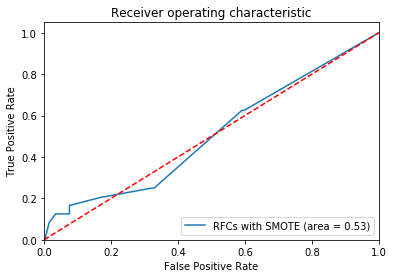

RFCs with ADASYN:


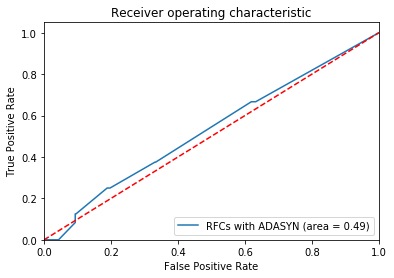

RFCs with US:


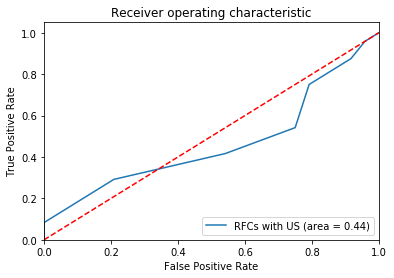

In [57]:
#AUC/ROC curves: 

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

print('RFCs with SMOTE :')
logit_roc_auc = roc_auc_score(y_test, rfc_smo.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc_smo.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RFCs with SMOTE (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

print('RFCs with ADASYN:')
logit_roc_auc = roc_auc_score(y_test, rfc_ada.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, rfc_ada.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RFCs with ADASYN (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

print('RFCs with US:')
logit_roc_auc = roc_auc_score(y_test_us, rfc_us.predict(x_test_us))
fpr, tpr, thresholds = roc_curve(y_test_us, rfc_us.predict_proba(x_test_us)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RFCs with US (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [58]:
### 6. Support Vector Machines - RBF
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Fitting Models
svc_smo = svm.SVC(probability = True, random_state=31)
svc_smo.fit(x_train_smo, y_train_smo)

svc_ada = svm.SVC(probability = True, random_state=31)
svc_ada.fit(x_train_ada, y_train_ada)

svc_us = svm.SVC(probability = True, random_state=31)
svc_us.fit(x_train_us, y_train_us)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=31,
    shrinking=True, tol=0.001, verbose=False)

In [59]:
# Creating predictions 
svc_pred_smo = svc_smo.predict(x_test)
print('Accuracy of SVM classifier - SMO on test set: {:.3f}'.format(accuracy_score(y_test, svc_pred_smo)))

svc_pred_ada = svc_ada.predict(x_test)
print('Accuracy of SVM classifier - ADA on test set: {:.3f}'.format(accuracy_score(y_test, svc_pred_ada)))

svc_pred_us = svc_us.predict(x_test_us)
print('Accuracy of SVM classifier - US on test set: {:.3f}'.format(accuracy_score(y_test_us, svc_pred_us)))

Accuracy of SVM classifier - SMO on test set: 0.846
Accuracy of SVM classifier - ADA on test set: 0.837
Accuracy of SVM classifier - US on test set: 0.542


In [60]:
# Confusion matrices
print('Confusion matrix - Support Vector Machine with Smote:')
print(confusion_matrix(y_test, svc_pred_smo))

print('\n','Confusion matrix - Support Vector Machine with Adasyn:')
print(confusion_matrix(y_test, svc_pred_ada))

print('\n','Confusion matrix - Support Vector Machine with UnderSampling:')
print(confusion_matrix(y_test_us, svc_pred_us))

Confusion matrix - Support Vector Machine with Smote:
[[407  55]
 [ 20   4]]

 Confusion matrix - Support Vector Machine with Adasyn:
[[404  58]
 [ 21   3]]

 Confusion matrix - Support Vector Machine with UnderSampling:
[[18  6]
 [16  8]]


In [61]:
# Accuracy measures: 
from sklearn.metrics import classification_report
print('Performance Measures - Support Vector Machine with Smote:')
print(classification_report(y_test, svc_pred_smo)) 

print('\n','Performance Measures - Support Vector Machine with Adasyn:')
print(classification_report(y_test,svc_pred_ada))

print('\n','Performance Measures - Support Vector Machine with UnderSampling:')
print(classification_report(y_test_us,svc_pred_us))

Performance Measures - Support Vector Machine with Smote:
              precision    recall  f1-score   support

           0       0.95      0.88      0.92       462
           1       0.07      0.17      0.10        24

    accuracy                           0.85       486
   macro avg       0.51      0.52      0.51       486
weighted avg       0.91      0.85      0.88       486


 Performance Measures - Support Vector Machine with Adasyn:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       462
           1       0.05      0.12      0.07        24

    accuracy                           0.84       486
   macro avg       0.50      0.50      0.49       486
weighted avg       0.91      0.84      0.87       486


 Performance Measures - Support Vector Machine with UnderSampling:
              precision    recall  f1-score   support

           0       0.53      0.75      0.62        24
           1       0.57      0.33      0.42       

RFCs with SMOTE :


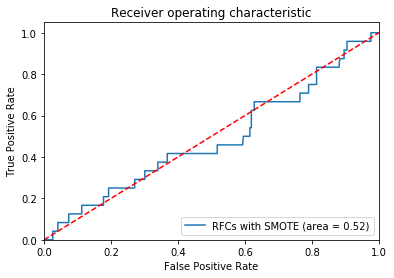

RFCs with ADASYN:


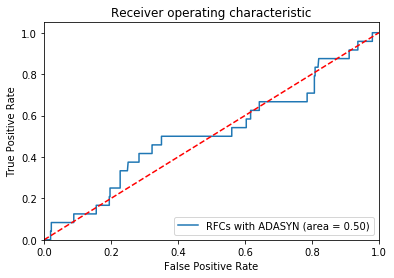

RFCs with US:


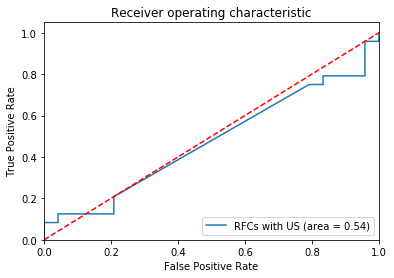

In [62]:
#AUC/ROC curves: 

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

print('RFCs with SMOTE :')
logit_roc_auc = roc_auc_score(y_test, svc_smo.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, svc_smo.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RFCs with SMOTE (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

print('RFCs with ADASYN:')
logit_roc_auc = roc_auc_score(y_test, svc_ada.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, svc_ada.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RFCs with ADASYN (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

print('RFCs with US:')
logit_roc_auc = roc_auc_score(y_test_us, svc_us.predict(x_test_us))
fpr, tpr, thresholds = roc_curve(y_test_us, svc_us.predict_proba(x_test_us)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RFCs with US (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [63]:
#### Tuning for SVM - RBF Kernel
from sklearn.model_selection import GridSearchCV

def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10, 15,20,100]
    gammas = [0.001, 0.01, 0.1, 1, 10, 100]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), 
                               param_grid, 
                               cv=nfolds,
                               scoring='roc_auc')
    grid_search.fit(X,y)
    grid_search.best_params_
    return grid_search.best_params_

In [64]:
svc_param_selection(x_train_smo,y_train_smo,5)
svc_param_selection(x_train_ada,y_train_ada,5)
svc_param_selection(x_train_us,y_train_us,5)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 0.001, 'gamma': 100}

In [65]:
from sklearn.model_selection import GridSearchCV

def svc_param_selection(X, y, nfolds):
    Cs = [15,20,25,30,50,100]
    gammas = [0.009,0.02,0.01,0.03]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), 
                               param_grid, 
                               cv=nfolds,
                               scoring='roc_auc')
    grid_search.fit(X,y)
    grid_search.best_params_
    return grid_search.best_params_

In [66]:
svc_param_selection(x_train_smo,y_train_smo,5)
svc_param_selection(x_train_ada,y_train_ada,5)
svc_param_selection(x_train_us,y_train_us,5)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 100, 'gamma': 0.009}

In [67]:
from sklearn.model_selection import GridSearchCV

def svc_param_selection(X, y, nfolds):
    Cs = [18,19,20,21,22,23]
    gammas = [0.008,0.009, 0.01,0.02]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), 
                               param_grid, 
                               cv=nfolds, 
                               scoring='roc_auc')
    grid_search.fit(X,y)
    grid_search.best_params_
    return grid_search.best_params_

In [68]:
svc_param_selection(x_train_smo,y_train_smo,5)
svc_param_selection(x_train_ada,y_train_ada,5)
svc_param_selection(x_train_us,y_train_us,5)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 20, 'gamma': 0.008}

In [14]:
# Support Vector Machines - Tuned models for RBF
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Fitting Models
svc_smo = svm.SVC(C= 19, gamma=0.01, probability = True, random_state=31)
svc_smo.fit(x_train_smo, y_train_smo)

svc_ada = svm.SVC(C= 20, gamma=0.01, probability = True, random_state=31)
svc_ada.fit(x_train_ada, y_train_ada)

svc_us = svm.SVC( probability = True, random_state=31)
svc_us.fit(x_train_us, y_train_us)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=31,
  shrinking=True, tol=0.001, verbose=False)

In [15]:
# Creating predictions 
svc_pred_smo = svc_smo.predict(x_test)
print('Accuracy of SVM classifier - SMO on test set: {:.3f}'.format(accuracy_score(y_test, svc_pred_smo)))

svc_pred_ada = svc_ada.predict(x_test)
print('Accuracy of SVM classifier - ADA on test set: {:.3f}'.format(accuracy_score(y_test, svc_pred_ada)))

svc_pred_us = svc_us.predict(x_test_us)
print('Accuracy of SVM classifier - US on test set: {:.3f}'.format(accuracy_score(y_test_us, svc_pred_us)))

Accuracy of SVM classifier - SMO on test set: 0.881
Accuracy of SVM classifier - ADA on test set: 0.881
Accuracy of SVM classifier - US on test set: 0.542


In [16]:
# Confusion matrices
print('Confusion matrix - Support Vector Machine with Smote:')
print(confusion_matrix(y_test, svc_pred_smo))

print('\n','Confusion matrix - Support Vector Machine with Adasyn:')
print(confusion_matrix(y_test, svc_pred_ada))

print('\n','Confusion matrix - Support Vector Machine with UnderSampling:')
print(confusion_matrix(y_test_us, svc_pred_us))

Confusion matrix - Support Vector Machine with Smote:
[[422  40]
 [ 18   6]]

 Confusion matrix - Support Vector Machine with Adasyn:
[[422  40]
 [ 18   6]]

 Confusion matrix - Support Vector Machine with UnderSampling:
[[18  6]
 [16  8]]


In [17]:
# Accuracy measures: 
from sklearn.metrics import classification_report
print('Performance Measures - Support Vector Machine with Smote:')
print(classification_report(y_test, svc_pred_smo)) 

print('\n','Performance Measures - Support Vector Machine with Adasyn:')
print(classification_report(y_test,svc_pred_ada))

print('\n','Performance Measures - Support Vector Machine with UnderSampling:')
print(classification_report(y_test_us,svc_pred_us))

Performance Measures - Support Vector Machine with Smote:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       462
           1       0.13      0.25      0.17        24

   micro avg       0.88      0.88      0.88       486
   macro avg       0.54      0.58      0.55       486
weighted avg       0.92      0.88      0.90       486


 Performance Measures - Support Vector Machine with Adasyn:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       462
           1       0.13      0.25      0.17        24

   micro avg       0.88      0.88      0.88       486
   macro avg       0.54      0.58      0.55       486
weighted avg       0.92      0.88      0.90       486


 Performance Measures - Support Vector Machine with UnderSampling:
              precision    recall  f1-score   support

           0       0.53      0.75      0.62        24
           1       0.57      0.33      0.42       

RFCs with SMOTE :


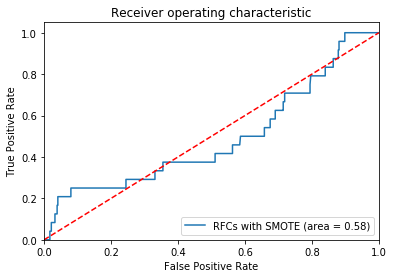

RFCs with ADASYN:


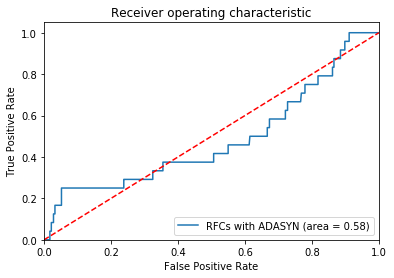

RFCs with US:


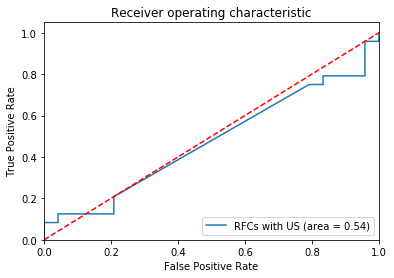

In [18]:
#AUC/ROC curves: 

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

print('RFCs with SMOTE :')
logit_roc_auc = roc_auc_score(y_test, svc_smo.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, svc_smo.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RFCs with SMOTE (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

print('RFCs with ADASYN:')
logit_roc_auc = roc_auc_score(y_test, svc_ada.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, svc_ada.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RFCs with ADASYN (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

print('RFCs with US:')
logit_roc_auc = roc_auc_score(y_test_us, svc_us.predict(x_test_us))
fpr, tpr, thresholds = roc_curve(y_test_us, svc_us.predict_proba(x_test_us)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RFCs with US (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [69]:
### Support Vector Machines - Linear
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Fitting Models
svc_smo = svm.SVC(kernel='linear', probability = True, random_state=31)
svc_smo.fit(x_train_smo, y_train_smo)

svc_ada = svm.SVC(kernel='linear', probability = True, random_state=31)
svc_ada.fit(x_train_ada, y_train_ada)

svc_us = svm.SVC(kernel='linear', probability = True, random_state=31)
svc_us.fit(x_train_us, y_train_us)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=31,
    shrinking=True, tol=0.001, verbose=False)

In [70]:
# Creating predictions 
svc_pred_smo = svc_smo.predict(x_test)
print('Accuracy of SVM classifier - SMO on test set: {:.3f}'.format(accuracy_score(y_test, svc_pred_smo)))

svc_pred_ada = svc_ada.predict(x_test)
print('Accuracy of SVM classifier - ADA on test set: {:.3f}'.format(accuracy_score(y_test, svc_pred_ada)))

svc_pred_us = svc_us.predict(x_test_us)
print('Accuracy of SVM classifier - US on test set: {:.3f}'.format(accuracy_score(y_test_us, svc_pred_us)))

Accuracy of SVM classifier - SMO on test set: 0.628
Accuracy of SVM classifier - ADA on test set: 0.673
Accuracy of SVM classifier - US on test set: 0.521


In [71]:
# Confusion matrices
print('Confusion matrix - Support Vector Machine with Smote:')
print(confusion_matrix(y_test, svc_pred_smo))

print('\n','Confusion matrix - Support Vector Machine with Adasyn:')
print(confusion_matrix(y_test, svc_pred_ada))

print('\n','Confusion matrix - Support Vector Machine with UnderSampling:')
print(confusion_matrix(y_test_us, svc_pred_us))

Confusion matrix - Support Vector Machine with Smote:
[[293 169]
 [ 12  12]]

 Confusion matrix - Support Vector Machine with Adasyn:
[[315 147]
 [ 12  12]]

 Confusion matrix - Support Vector Machine with UnderSampling:
[[ 8 16]
 [ 7 17]]


RFCs with SMOTE :


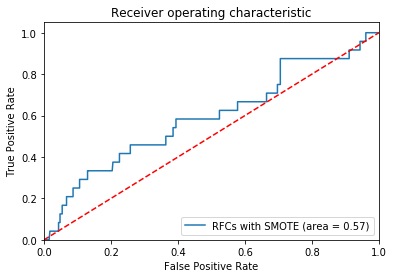

RFCs with ADASYN:


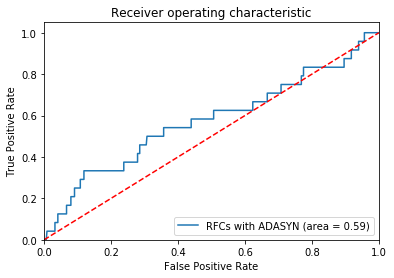

RFCs with US:


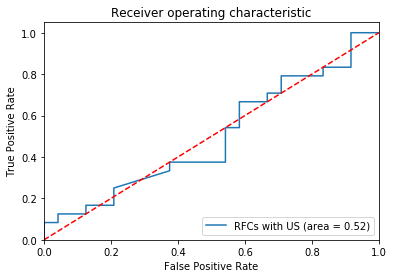

In [72]:
#AUC/ROC curves: 

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

print('RFCs with SMOTE :')
logit_roc_auc = roc_auc_score(y_test, svc_smo.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, svc_smo.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RFCs with SMOTE (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

print('RFCs with ADASYN:')
logit_roc_auc = roc_auc_score(y_test, svc_ada.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, svc_ada.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RFCs with ADASYN (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

print('RFCs with US:')
logit_roc_auc = roc_auc_score(y_test_us, svc_us.predict(x_test_us))
fpr, tpr, thresholds = roc_curve(y_test_us, svc_us.predict_proba(x_test_us)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RFCs with US (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [73]:
### Tuning SVM - Linear kernel
from sklearn.model_selection import GridSearchCV

def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10,100]
    param_grid = {'C': Cs}
    grid_search = GridSearchCV(svm.SVC(kernel='linear'), 
                               param_grid, 
                               cv=nfolds)
    grid_search.fit(x_train_ada,y_train_ada)
    grid_search.best_params_
    return grid_search.best_params_

In [ ]:
svc_param_selection(x_train_smo,y_train_smo,5)
svc_param_selection(x_train_ada,y_train_ada,5)
svc_param_selection(x_train_us,y_train_us,5)

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

def svc_param_selection(X, y, nfolds):
    Cs = [80,100,120]
    param_grid = {'C': Cs}
    grid_search = GridSearchCV(svm.SVC(kernel='linear'), 
                               param_grid, 
                               cv=nfolds, 
                               scoring='roc_auc')
    grid_search.fit(X,y)
    grid_search.best_params_
    return grid_search.best_params_

In [ ]:
svc_param_selection(x_train_smo,y_train_smo,5)
svc_param_selection(x_train_ada,y_train_ada,5)
svc_param_selection(x_train_us,y_train_us,5)

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

def svc_param_selection(X, y, nfolds):
    Cs = [103,105,110]
    param_grid = {'C': Cs}
    grid_search = GridSearchCV(svm.SVC(kernel='linear'), 
                               param_grid, 
                               cv=nfolds, 
                               scoring='roc_auc')
    grid_search.fit(X,y)
    grid_search.best_params_
    return grid_search.best_params_

In [ ]:
svc_param_selection(x_train_smo,y_train_smo,5)
svc_param_selection(x_train_ada,y_train_ada,5)
svc_param_selection(x_train_us,y_train_us,5)

In [ ]:
### Support Vector Machines - Tuned model for linear
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Fitting Models
svc_smo = svm.SVC(kernel = 'linear',C=46, probability = True,random_state=30)
svc_smo.fit(x_train_smo, y_train_smo)

svc_ada = svm.SVC(kernel = 'linear',C=105, probability = True,random_state=30)
svc_ada.fit(x_train_ada, y_train_ada)

svc_us = svm.SVC(kernel = 'linear', probability = True,random_state=30)
svc_us.fit(x_train_us, y_train_us)

In [22]:
# Creating predictions 
svc_pred_smo = svc_smo.predict(x_test)
print('Accuracy of SVM classifier - SMO on test set: {:.3f}'.format(accuracy_score(y_test, svc_pred_smo)))

svc_pred_ada = svc_ada.predict(x_test)
print('Accuracy of SVM classifier - ADA on test set: {:.3f}'.format(accuracy_score(y_test, svc_pred_ada)))

svc_pred_us = svc_us.predict(x_test_us)
print('Accuracy of SVM classifier - US on test set: {:.3f}'.format(accuracy_score(y_test_us, svc_pred_us)))

Accuracy of SVM classifier - SMO on test set: 0.636
Accuracy of SVM classifier - ADA on test set: 0.700
Accuracy of SVM classifier - US on test set: 0.521


In [23]:
# Confusion matrices
print('Confusion matrix - Support Vector Machine with Smote:')
print(confusion_matrix(y_test, svc_pred_smo))

print('\n','Confusion matrix - Support Vector Machine with Adasyn:')
print(confusion_matrix(y_test, svc_pred_ada))

print('\n','Confusion matrix - Support Vector Machine with UnderSampling:')
print(confusion_matrix(y_test_us, svc_pred_us))

Confusion matrix - Support Vector Machine with Smote:
[[296 166]
 [ 11  13]]

 Confusion matrix - Support Vector Machine with Adasyn:
[[330 132]
 [ 14  10]]

 Confusion matrix - Support Vector Machine with UnderSampling:
[[ 8 16]
 [ 7 17]]


RFCs with SMOTE :


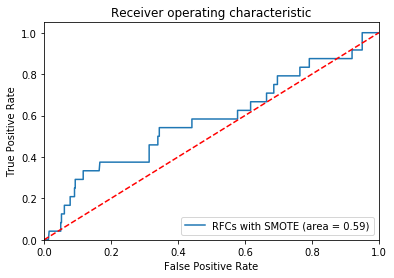

RFCs with ADASYN:


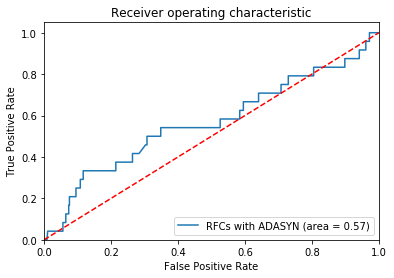

RFCs with US:


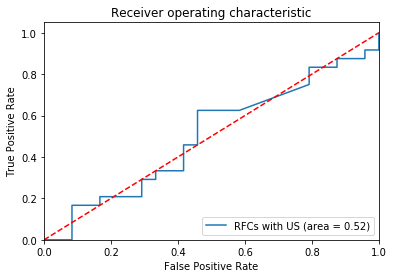

In [24]:
#AUC/ROC curves: 

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

print('RFCs with SMOTE :')
logit_roc_auc = roc_auc_score(y_test, svc_smo.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, svc_smo.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RFCs with SMOTE (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

print('RFCs with ADASYN:')
logit_roc_auc = roc_auc_score(y_test, svc_ada.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, svc_ada.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RFCs with ADASYN (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

print('RFCs with US:')
logit_roc_auc = roc_auc_score(y_test_us, svc_us.predict(x_test_us))
fpr, tpr, thresholds = roc_curve(y_test_us, svc_us.predict_proba(x_test_us)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RFCs with US (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()